In [7]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from analysis import Validation

In [8]:
babies = glob.glob("../analysis/studies/onelep/output/Run2/*.root")
babies = [baby for baby in babies if "data" not in baby]
babies

['../analysis/studies/onelep/output/Run2/Bosons.root',
 '../analysis/studies/onelep/output/Run2/WJets.root',
 '../analysis/studies/onelep/output/Run2/SingleTop.root',
 '../analysis/studies/onelep/output/Run2/TTbar2L.root',
 '../analysis/studies/onelep/output/Run2/VH.root',
 '../analysis/studies/onelep/output/Run2/TTX.root',
 '../analysis/studies/onelep/output/Run2/TTbar1L.root',
 '../analysis/studies/onelep/output/Run2/VBSWH_mkW.root']

In [13]:
vbswh = Validation(
    bkg_root_files=babies[:-1],
    data_root_files=babies[-1:],
    ttree_name="tree",
    weight_columns=["xsec_sf", "lep_sf"]
)
vbswh.make_selection("M_jj > 500 and abs(deta_jj) > 3 and ST < 1000")

In [14]:
vbswh.print_cutflow()

,Bosons,,WJets,,SingleTop,,TTbar2L,,VH,,TTX,,TTbar1L,,VBSWH_mkW,
,raw,wgt,raw,wgt,raw,wgt,raw,wgt,raw,wgt,raw,wgt,raw,wgt,raw,wgt
base,7313,25.82436570847907,8006,403.8146423268398,3900,279.38315855173926,13131,428.26302774605176,11795,6.087993183220132,27780,29.707677227148892,106470,4528.931543474207,4687,684.7061090291007
M_jj_gt_500_and_abs(deta_jj)_gt_3_and_ST_lt_1000,6678,24.794495193927006,6786,387.893206055294,3805,268.1350450786199,12935,422.18850814872974,11329,5.491774426881666,26645,28.769969307582024,105203,4476.4701826626715,2618,385.1058422710249


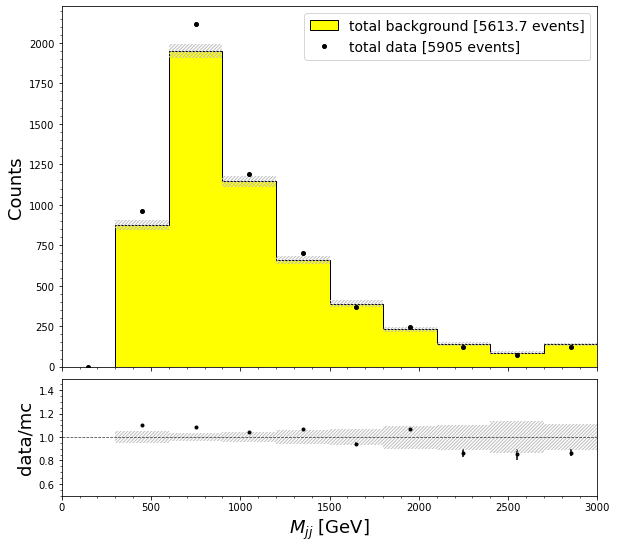

In [5]:
vbswh.plot_data_vs_mc("M_jj", bins=np.linspace(0, 3000, 11), x_label=r"$M_{jj}$ [GeV]")

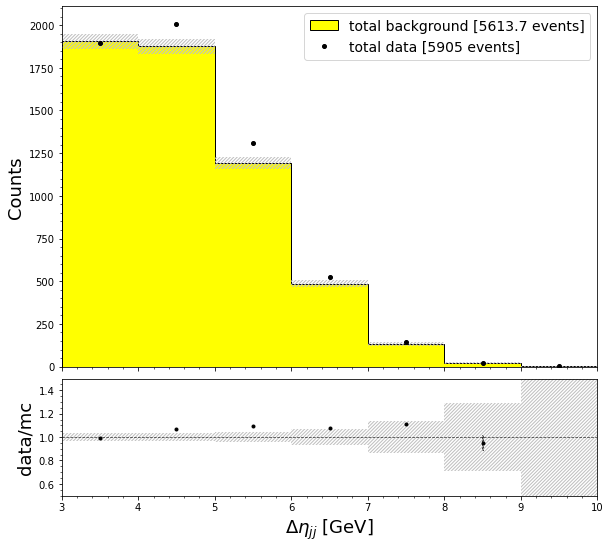

In [6]:
vbswh.plot_data_vs_mc(
    "deta_jj", bins=np.linspace(3, 10, 8), x_label=r"$\Delta\eta_{jj}$ [GeV]", transf=np.abs
)